**Assignment 06**

**Q.1 Use Logistic Regression for Diabetic Datasets to predict the person is diabetic or not. Visualise confusion matrix.                                                     
Q.2 Find accuracy, precision, recall, F1 score.**

In [1]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


Accuracy:  0.7532467532467533
Precision:  0.6491228070175439
Recall:  0.6727272727272727
F1 Score:  0.6607142857142858


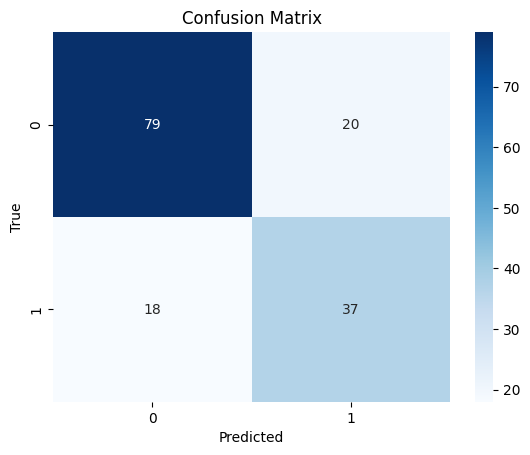

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('diabetes.csv')

# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate metrics
cm = confusion_matrix(y_test, y_pred)

def evaluate_metrics(y_true, y_pred):
  TN, FP, FN, TP = cm.ravel()

  accuracy = (TP + TN) / (TP + TN + FP + FN)
  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  f1 = 2 * precision * recall / (precision + recall)

  return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = evaluate_metrics(y_test, y_pred)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)

# Visualize confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()